In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/002_308_124_85_85.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/6.jpg
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/013_413_109_148_148.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/018_365_456_112_112.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/003_162_1007_148_148.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/014_683_351_162_162.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/022_101_1220_212_212.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/014_202_611_148_148.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/013_405_784_212_212.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/010_675_1071_123_123.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/037_700_1260_102_102.png
/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/shock/024_413_400_148_148.png
/kaggle/

In [2]:
from tensorflow.data import AUTOTUNE
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.6.4


In [4]:
Batch_SIZE = 64
NUM_STEPS = 5000
img_height = 180
img_width = 180
data_dir = "/kaggle/input/manga-faces-dataset/Manga-Faces-dataset/"

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_SIZE)

Found 509 files belonging to 11 classes.
Using 408 files for training.


2022-08-10 13:32:20.799730: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=Batch_SIZE)

Found 509 files belonging to 11 classes.
Using 101 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

11


2022-08-10 13:32:21.117882: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called..

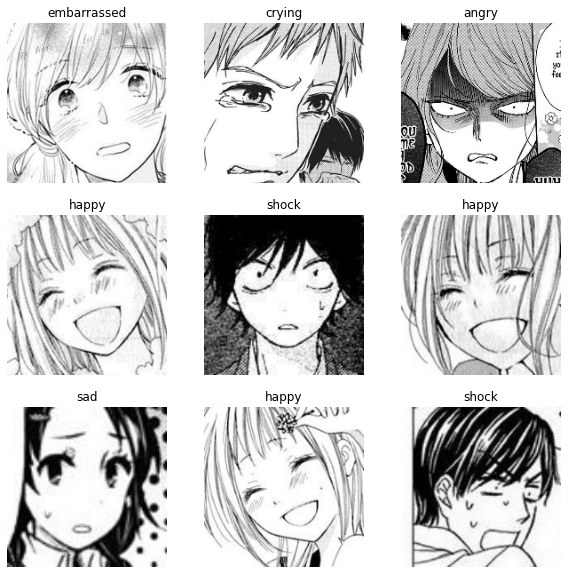

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

(64, 180, 180, 3)
(64,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.ZeroPadding2D(3),
    tf.keras.layers.Conv2D(32, (7,7),1, activation='relu'),
    tf.keras.layers.BatchNormalization(axis=3, momentum = 0.99, epsilon=0.001),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

7/7 [==============================] - ETA: 0s - loss: 23.4232 - accuracy: 0.1520

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

7/7 [==============================] - 6s 694ms/step - loss: 23.4232 - accuracy: 0.1520 - val_loss: 18.4331 - val_accuracy: 0.0990
Epoch 2/10
7/7 [==============================] - 4s 599ms/step - loss: 8.5851 - accuracy: 0.3848 - val_loss: 11.6546 - val_accuracy: 0.1782
Epoch 3/10
7/7 [==============================] - 5s 678ms/step - loss: 2.9360 - accuracy: 0.6127 - val_loss: 11.8049 - val_accuracy: 0.1089
Epoch 4/10
7/7 [==============================] - 4s 597ms/step - loss: 1.2813 - accuracy: 0.7770 - val_loss: 20.8984 - val_accuracy: 0.0990
Epoch 5/10
7/7 [==============================] - 4s 605ms/step - loss: 0.6253 - accuracy: 0.9093 - val_loss: 14.9661 - val_accuracy: 0.1584
Epoch 6/10
7/7 [==============================] - 4s 604ms/step - loss: 0.3018 - accuracy: 0.9583 - val_loss: 10.1888 - val_accuracy: 0.1485
Epoch 7/10
7/7 [==============================] - 4s 626ms/step - loss: 0.1505 - accuracy: 0.9632 - val_loss: 10.9232 - val_accuracy: 0.1584
Epoch 8/10
7/7 [=======

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 186, 186, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 259200)            0         
_________________________________________________________________
dense (Dense)                (None, 11)                2

In [20]:
# img = None

# for images, labels in val_ds.take(1):
#   for i in range(10):
#     img = images[i].numpy().astype("uint8")
#     real_label = class_names[labels[10]]
# pred = model.predict(img)

ValueError: in user code:

    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1537 predict_step
        return self(x, training=False)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:415 call
        inputs, training=training, mask=mask)
    /opt/conda/lib/python3.7/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /opt/conda/lib/python3.7/site-packages/keras/engine/input_spec.py:218 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer zero_padding2d is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: (None, 180, 3)


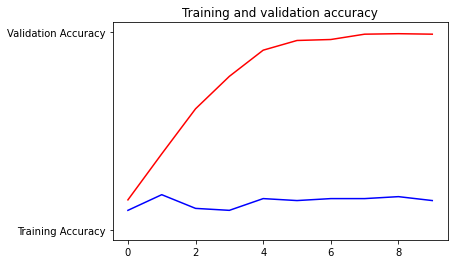

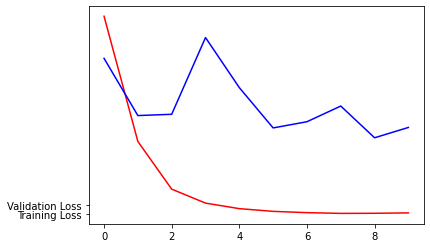

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()